<a href="https://colab.research.google.com/github/dataanalysisj7/forecast_sales/blob/main/sales_intelligence_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales intelligence analytics: uncovering Patterns, seasonality, and performance drivers in Rossmann Retail Data.


- Dataset: https://www.kaggle.com/c/rossmann-store-sales/data

## Importing libraries and dataset.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Sales Dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
sales_train_df = pd.read_csv('/content/drive/MyDrive/data_science/datasets/train.csv', low_memory=False)

In [14]:
sales_train_df.shape

(1017209, 9)

In [16]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Store Dataset



In [19]:
store_info_df = pd.read_csv('/content/drive/MyDrive/data_science/datasets/store.csv')

In [20]:
store_info_df.shape

(1115, 10)

In [21]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [23]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploratory Data Analysis (EDA)




### Sales Data



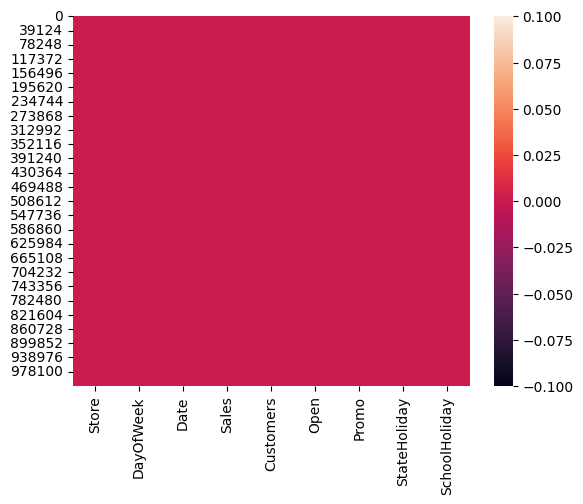

In [24]:
sns.heatmap(sales_train_df.isnull());

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

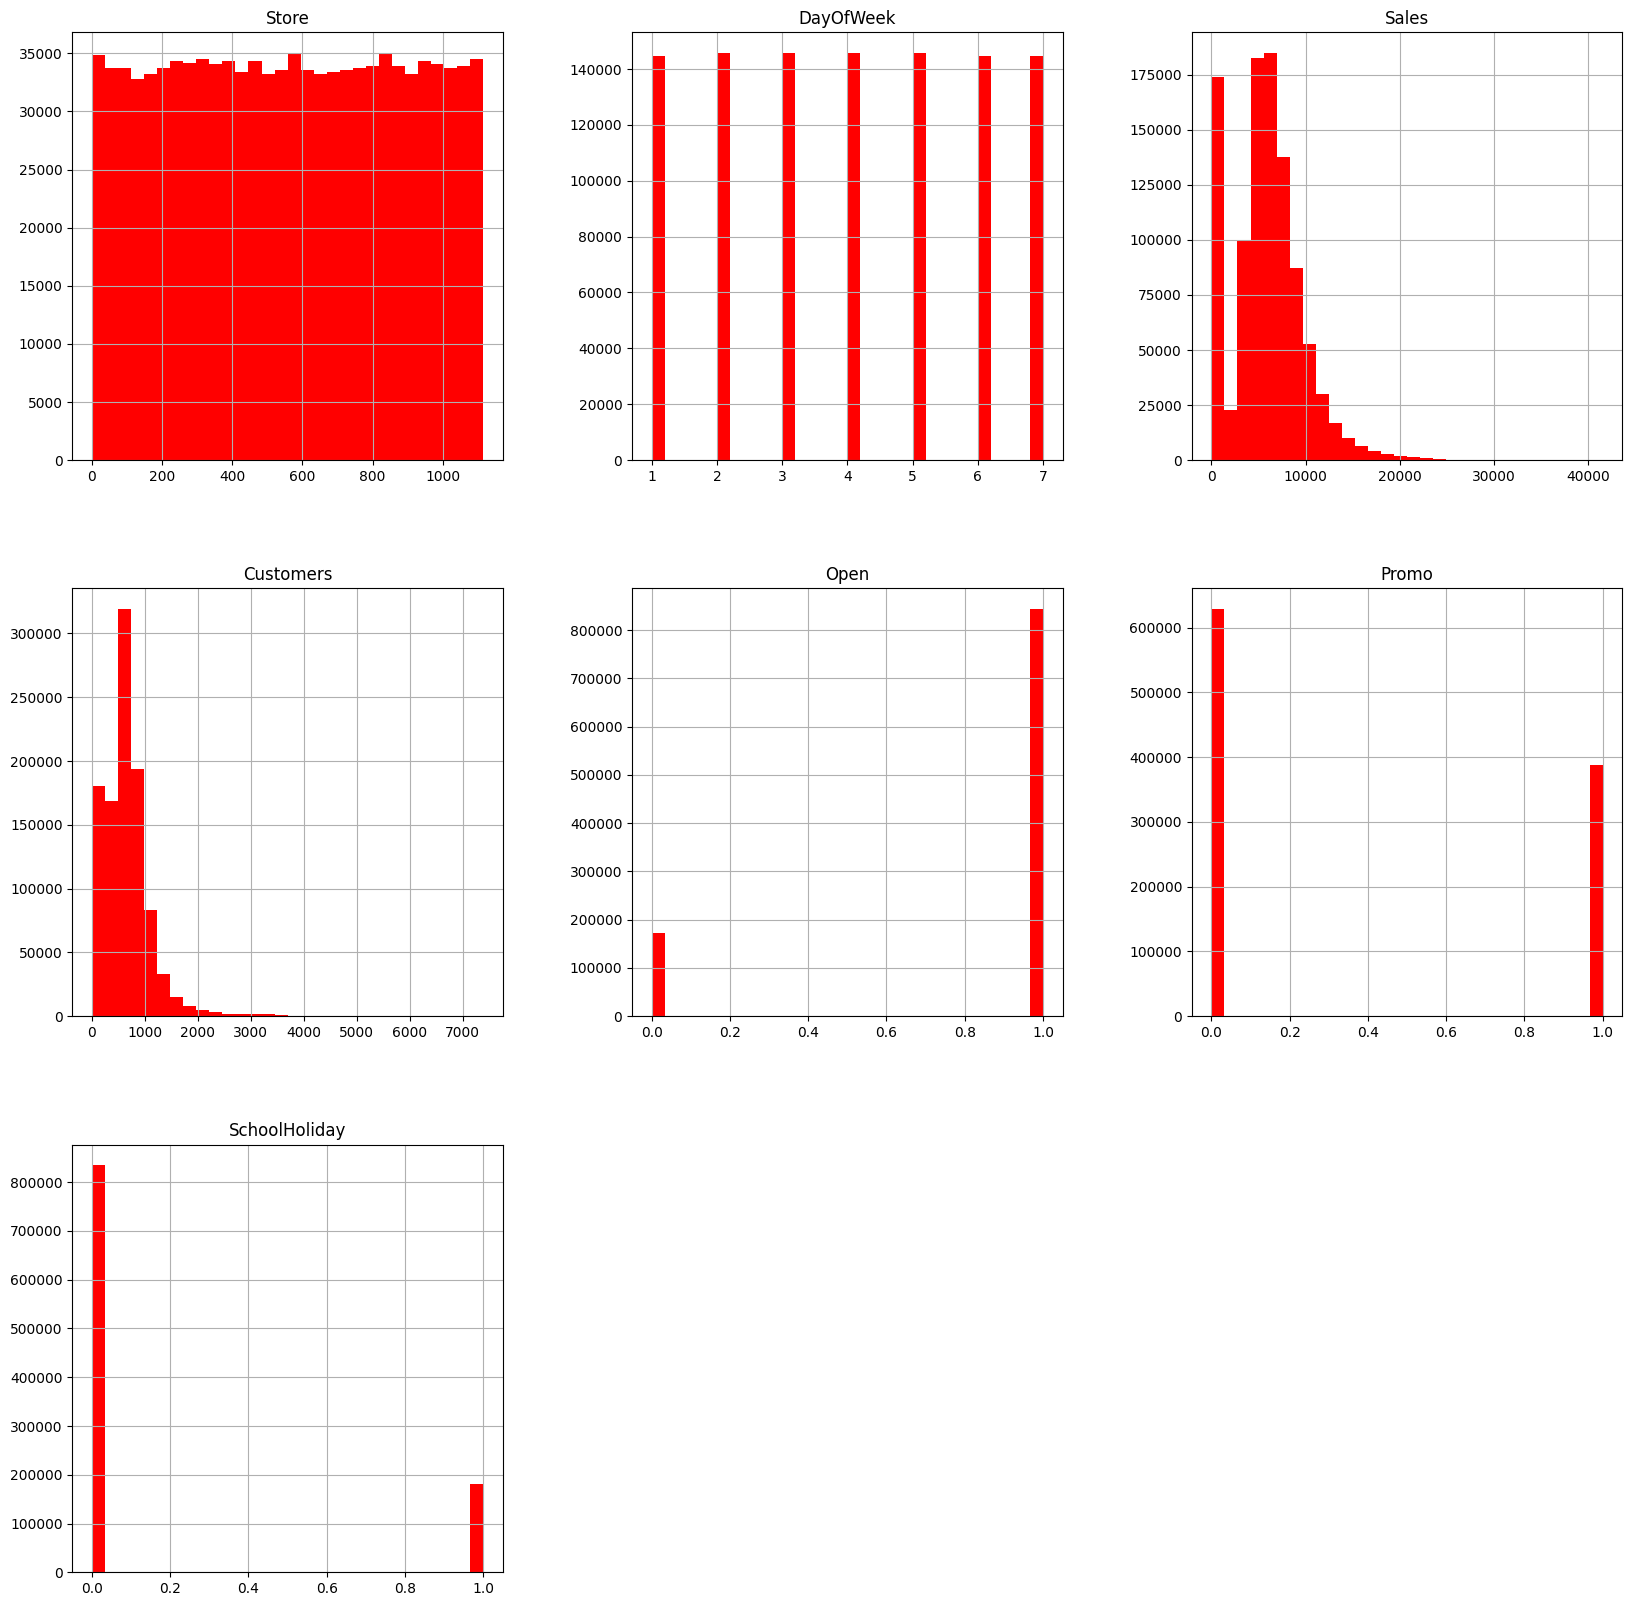

In [26]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [27]:
sales_train_df['Customers'].max()

7388

In [28]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [29]:
print('Total observations = ', len(sales_train_df))
print('Closed store-days = ', len(closed_train_df))
print('Open store-days = ', len(open_train_df))


Total observations =  1017209
Closed store-days =  172817
Open store-days =  844392


In [30]:
172817 / len(store_info_df)

154.99282511210762

In [31]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [32]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [33]:
sales_train_df.shape

(844392, 9)

In [34]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [35]:
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [36]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [37]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Store Data

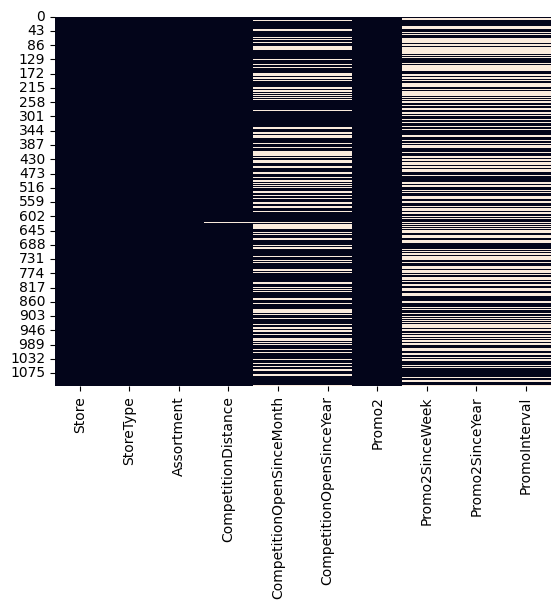

In [38]:
sns.heatmap(store_info_df.isnull(), cbar=False);

In [42]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

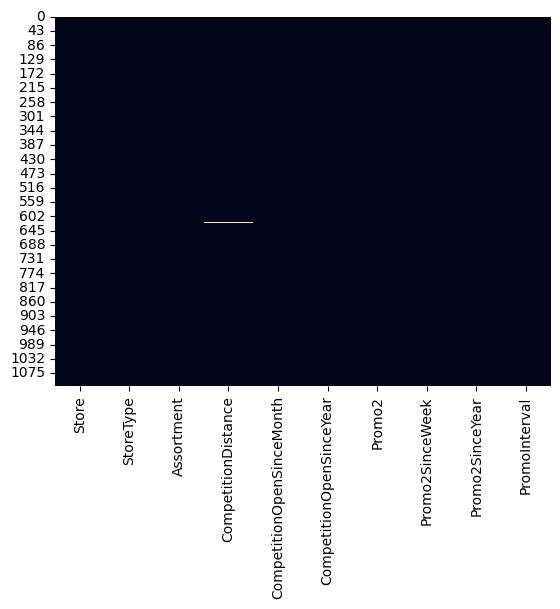

In [44]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [ ]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

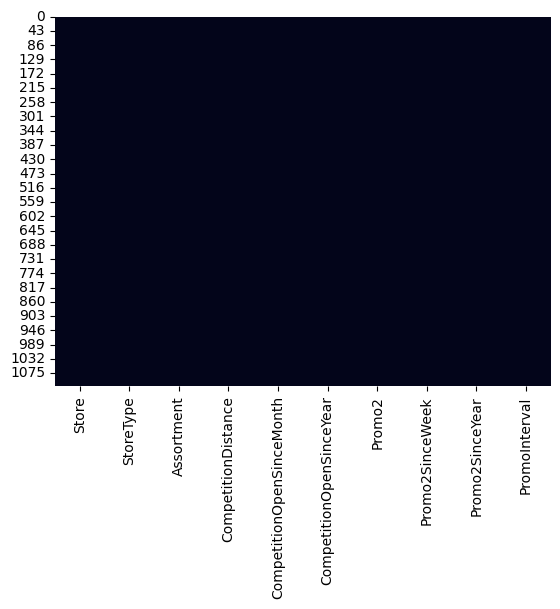

In [46]:
sns.heatmap(store_info_df.isnull(), cbar = False);

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

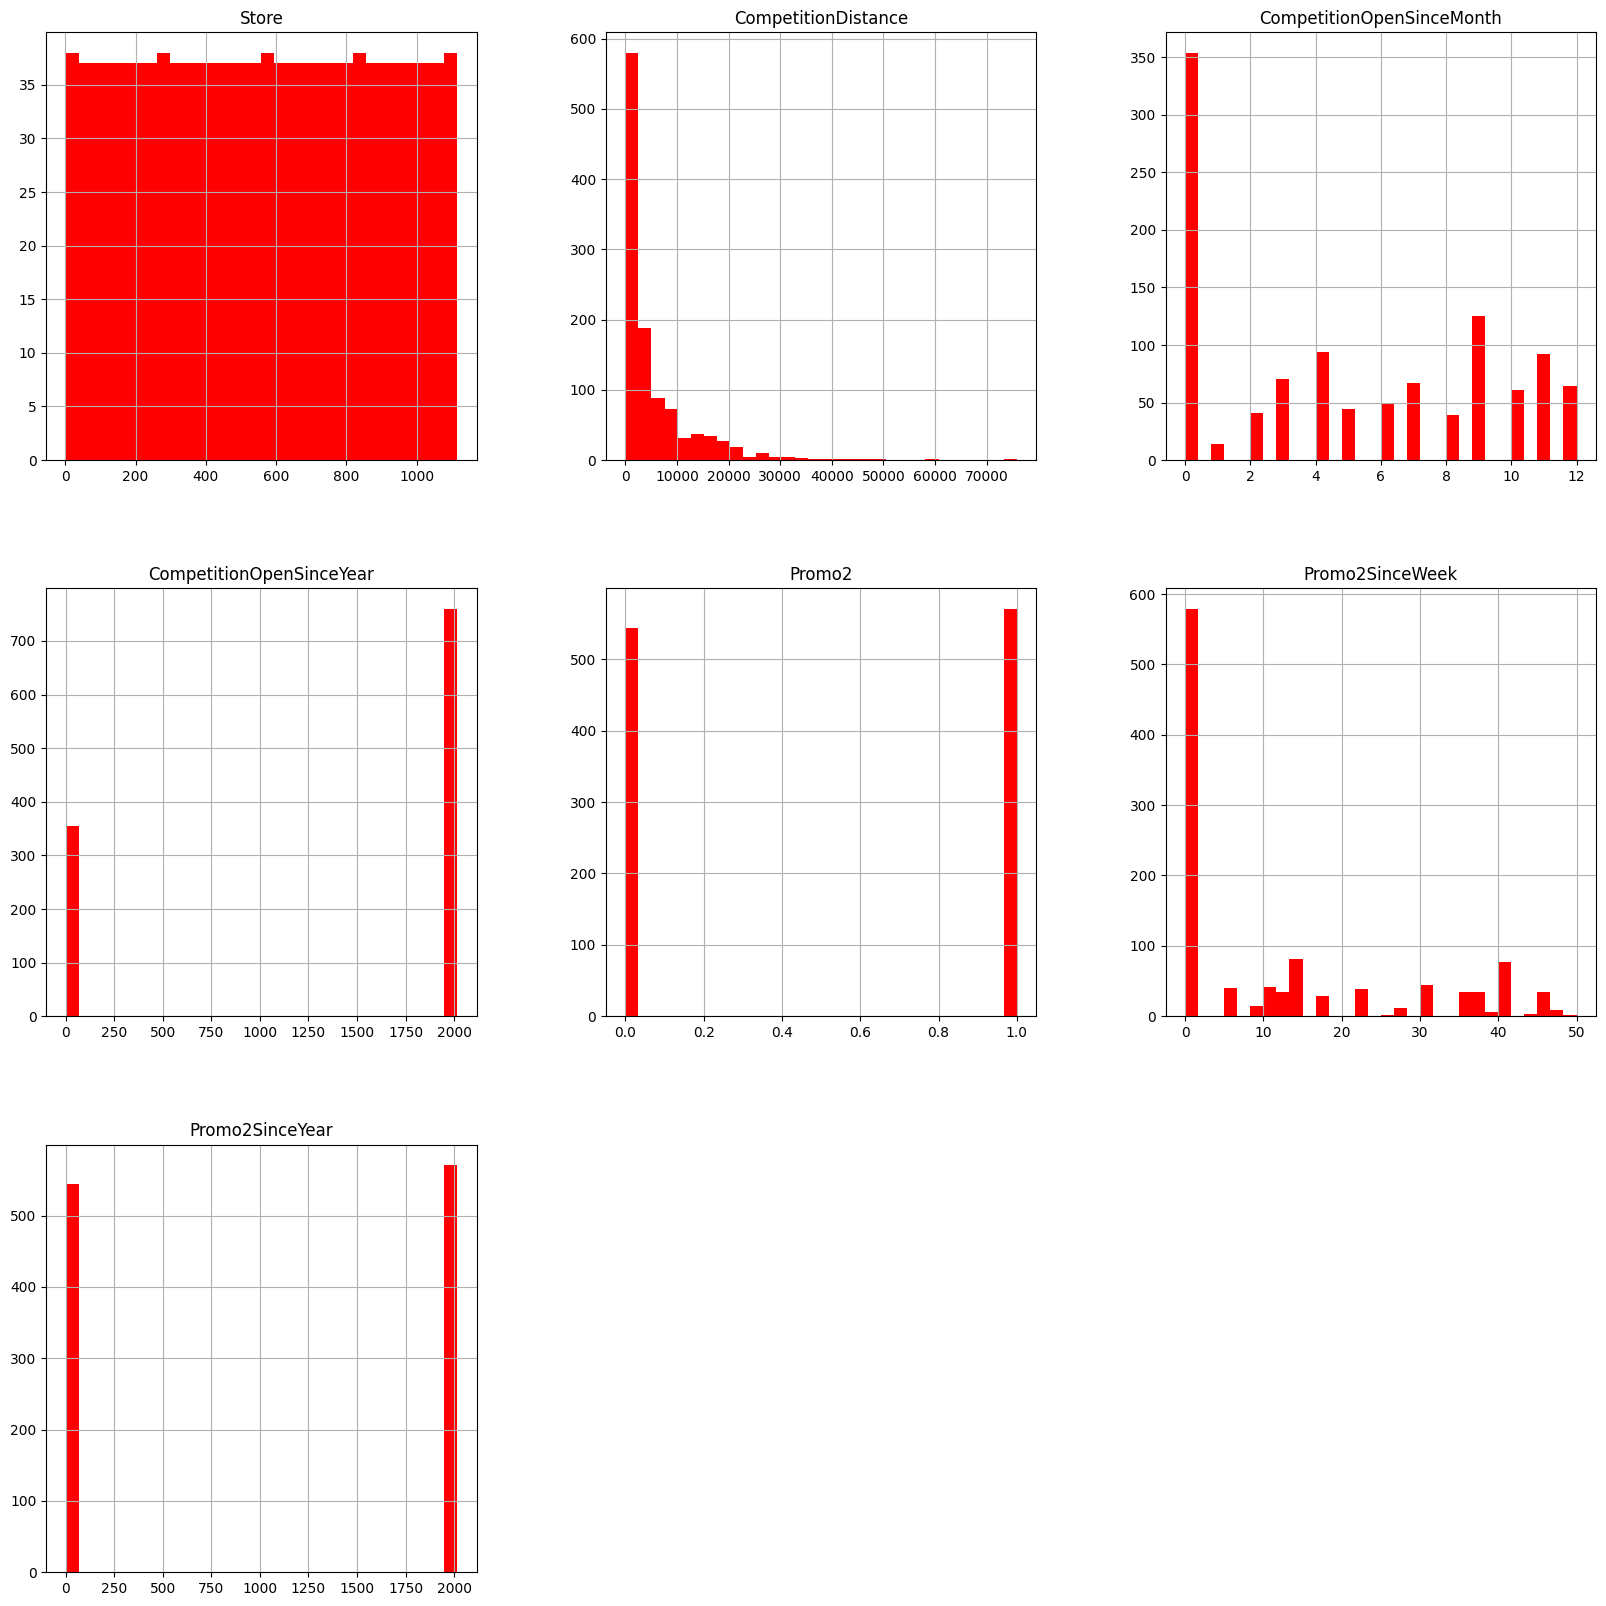

In [47]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

### Merged Sales and Store Data



In [48]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [49]:
sales_train_all_df.shape

(844392, 17)

In [50]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
844391,1097,2,2013-01-01,5961,1405,0,a,1,b,b,720.0,3.0,2002.0,0,0.0,0.0,0


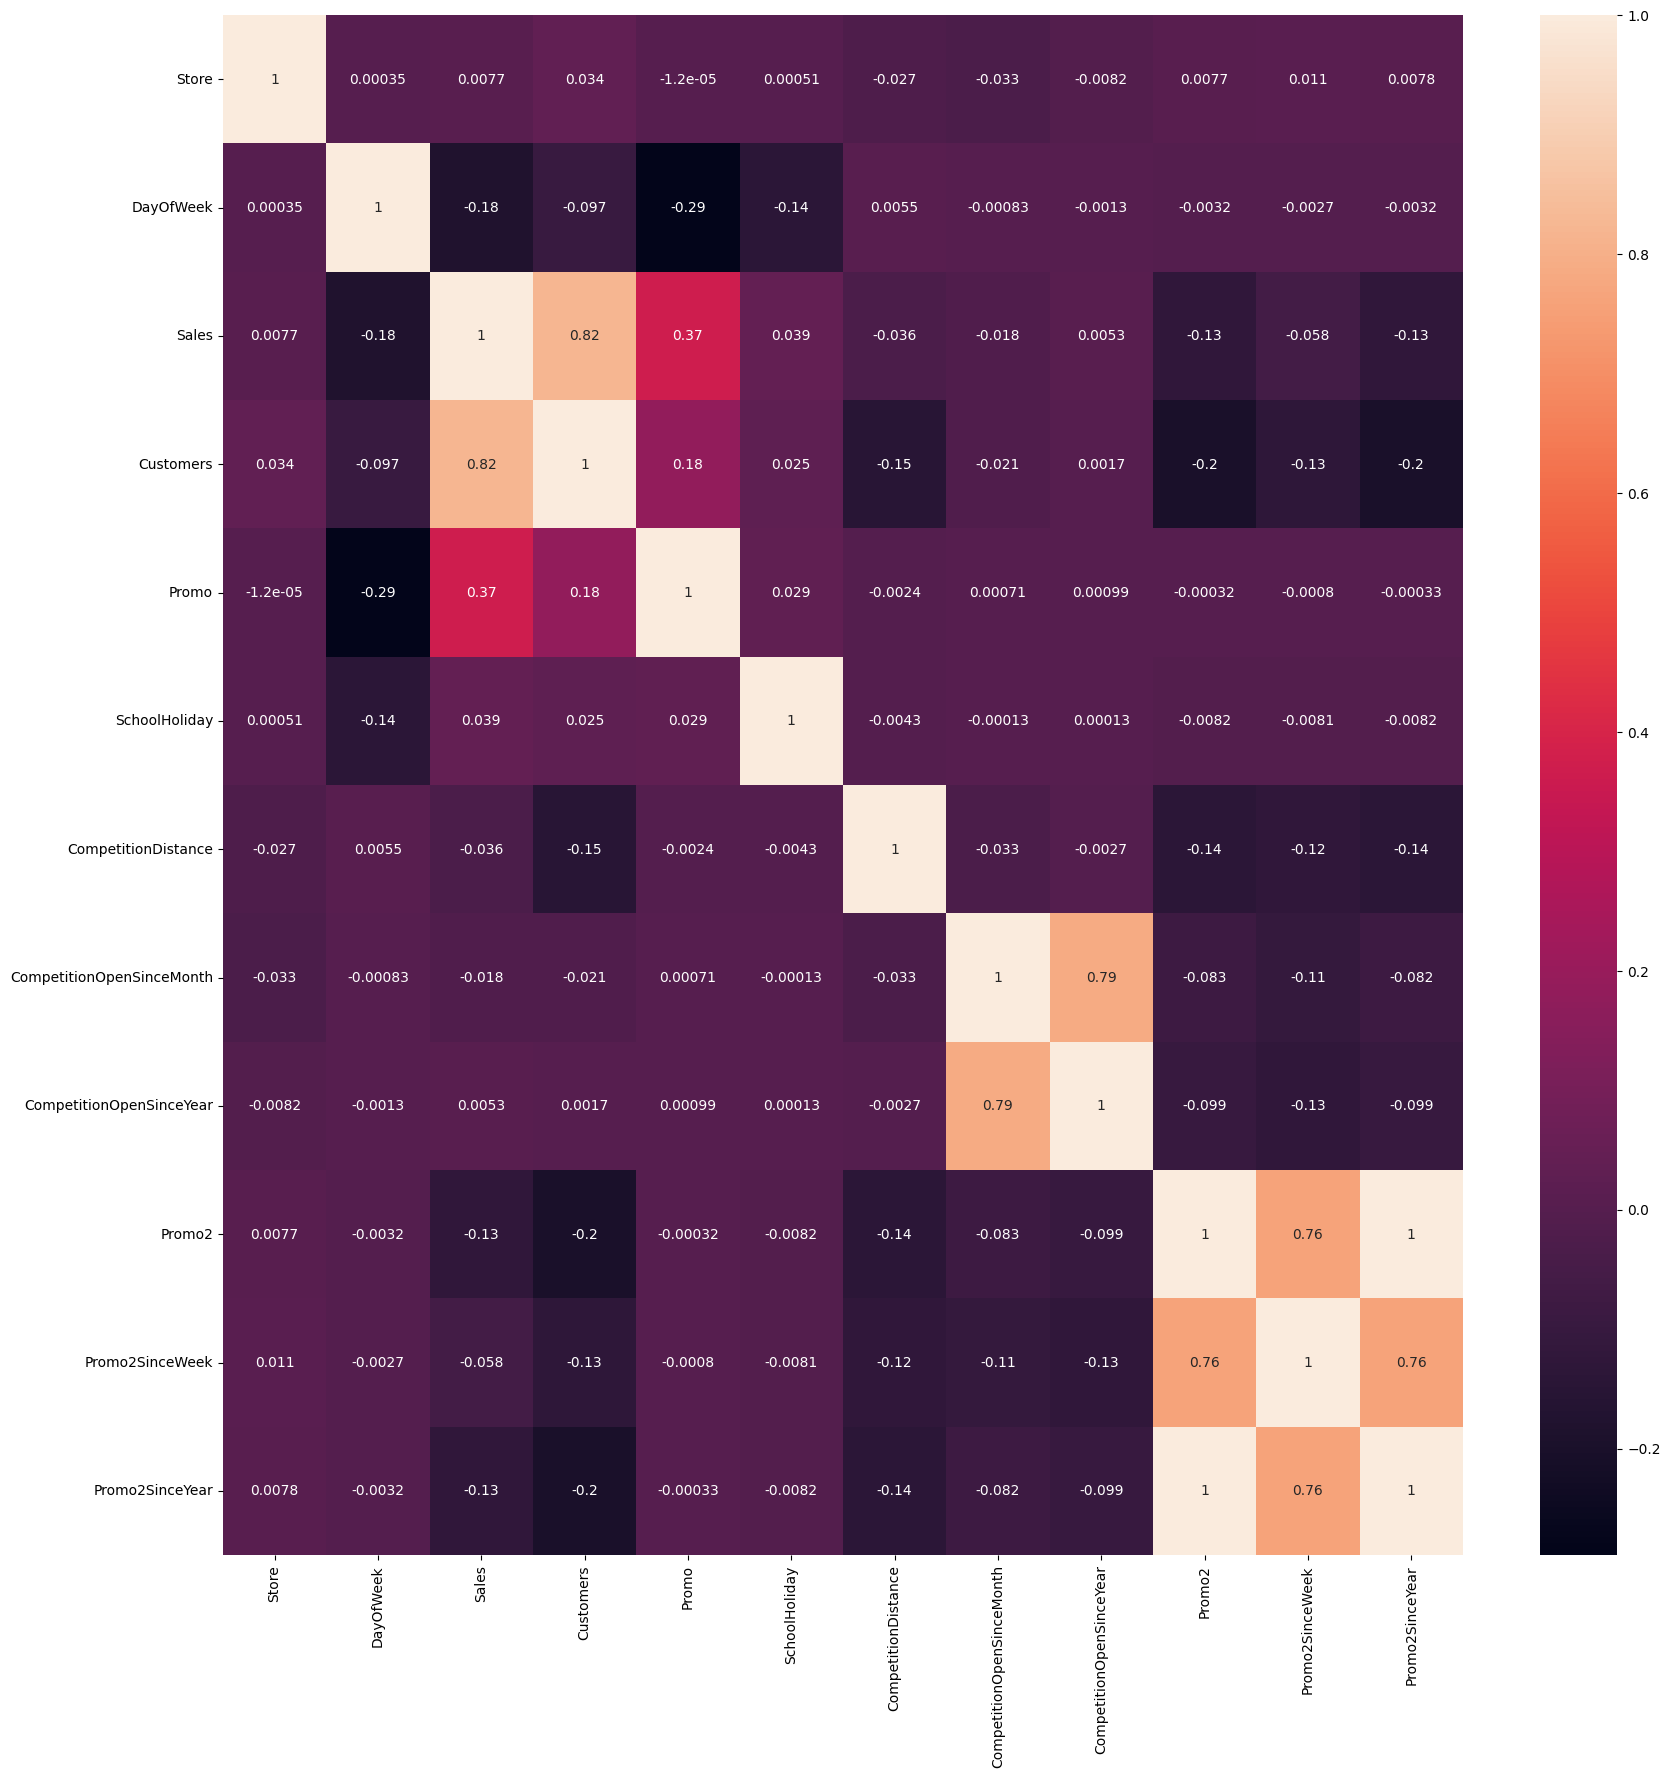

In [51]:
correlations = sales_train_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [52]:
correlations = sales_train_all_df.corr(numeric_only=True)['Sales'].sort_values()
correlations

,Sales
DayOfWeek,-0.178736
Promo2SinceYear,-0.127621
Promo2,-0.127596
Promo2SinceWeek,-0.058476
CompetitionDistance,-0.036343
CompetitionOpenSinceMonth,-0.018370
CompetitionOpenSinceYear,0.005266
Store,0.007710
SchoolHoliday,0.038617
Promo,0.368145


In [53]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [54]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015


In [55]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [56]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


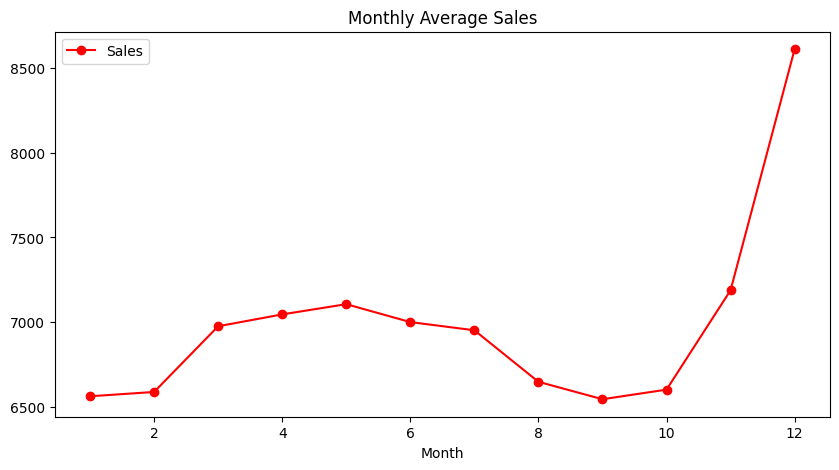

In [60]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Monthly Average Sales');

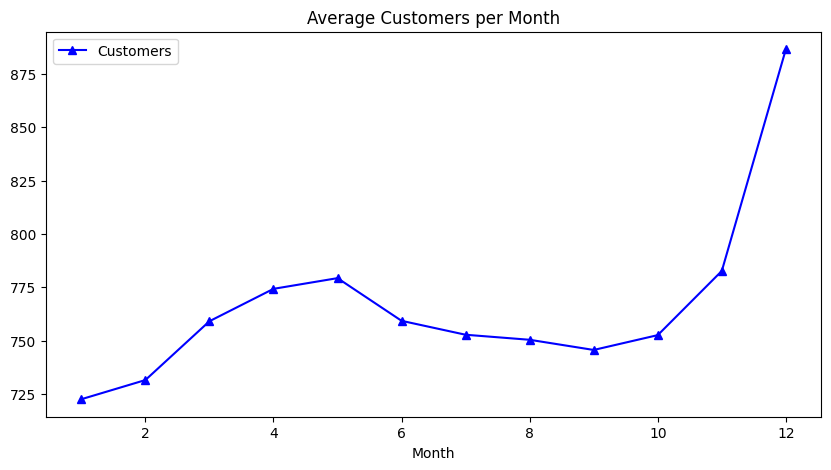

In [63]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers per Month');

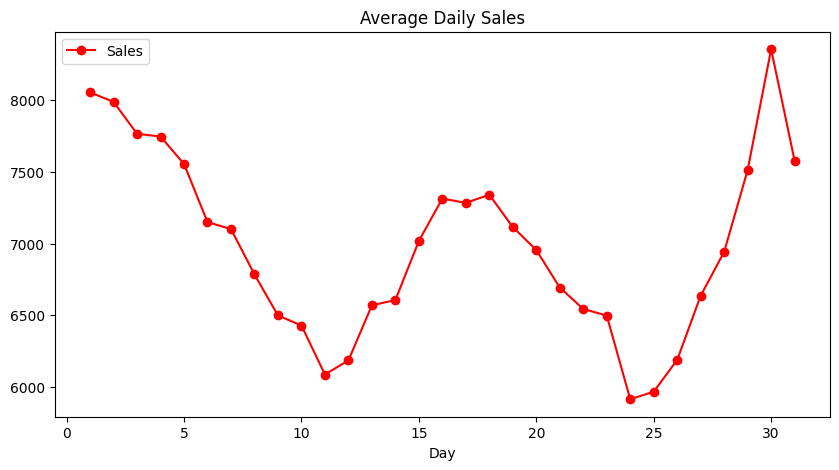

In [95]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Daily Sales');

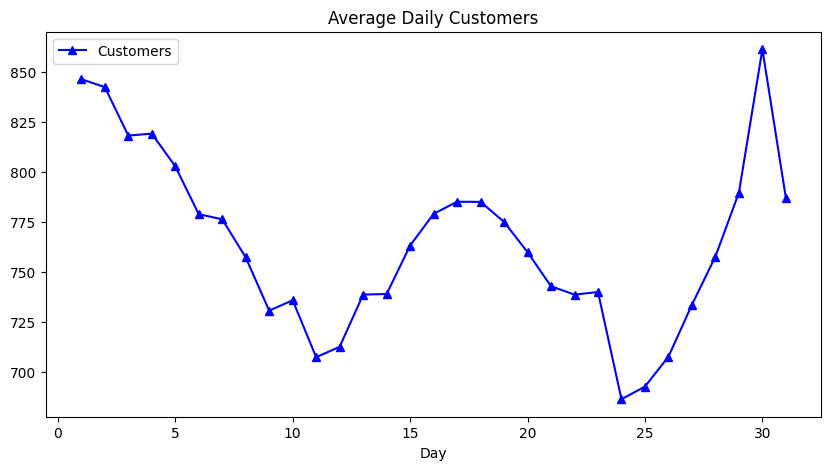

In [97]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Daily Customers');

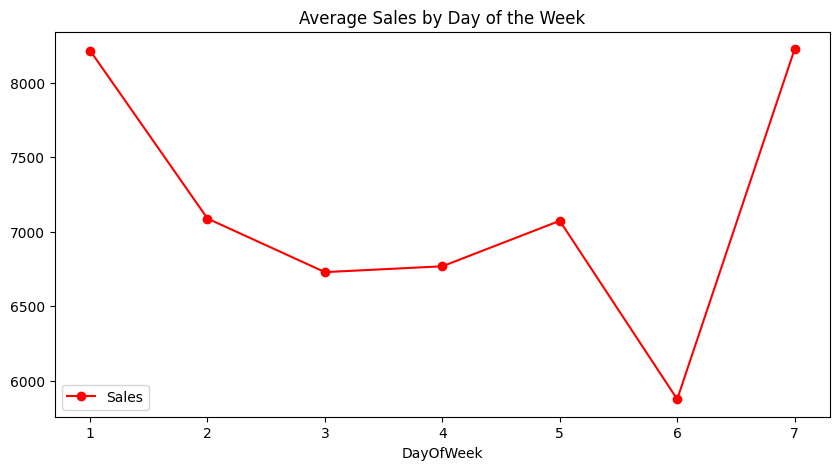

In [66]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales by Day of the Week');

Text(0.5, 1.0, 'Average Customers by Day of the Week')

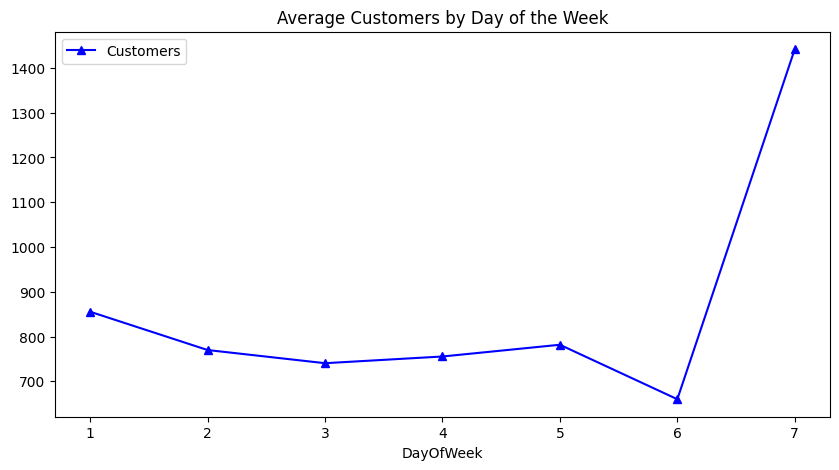

In [67]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers by Day of the Week')

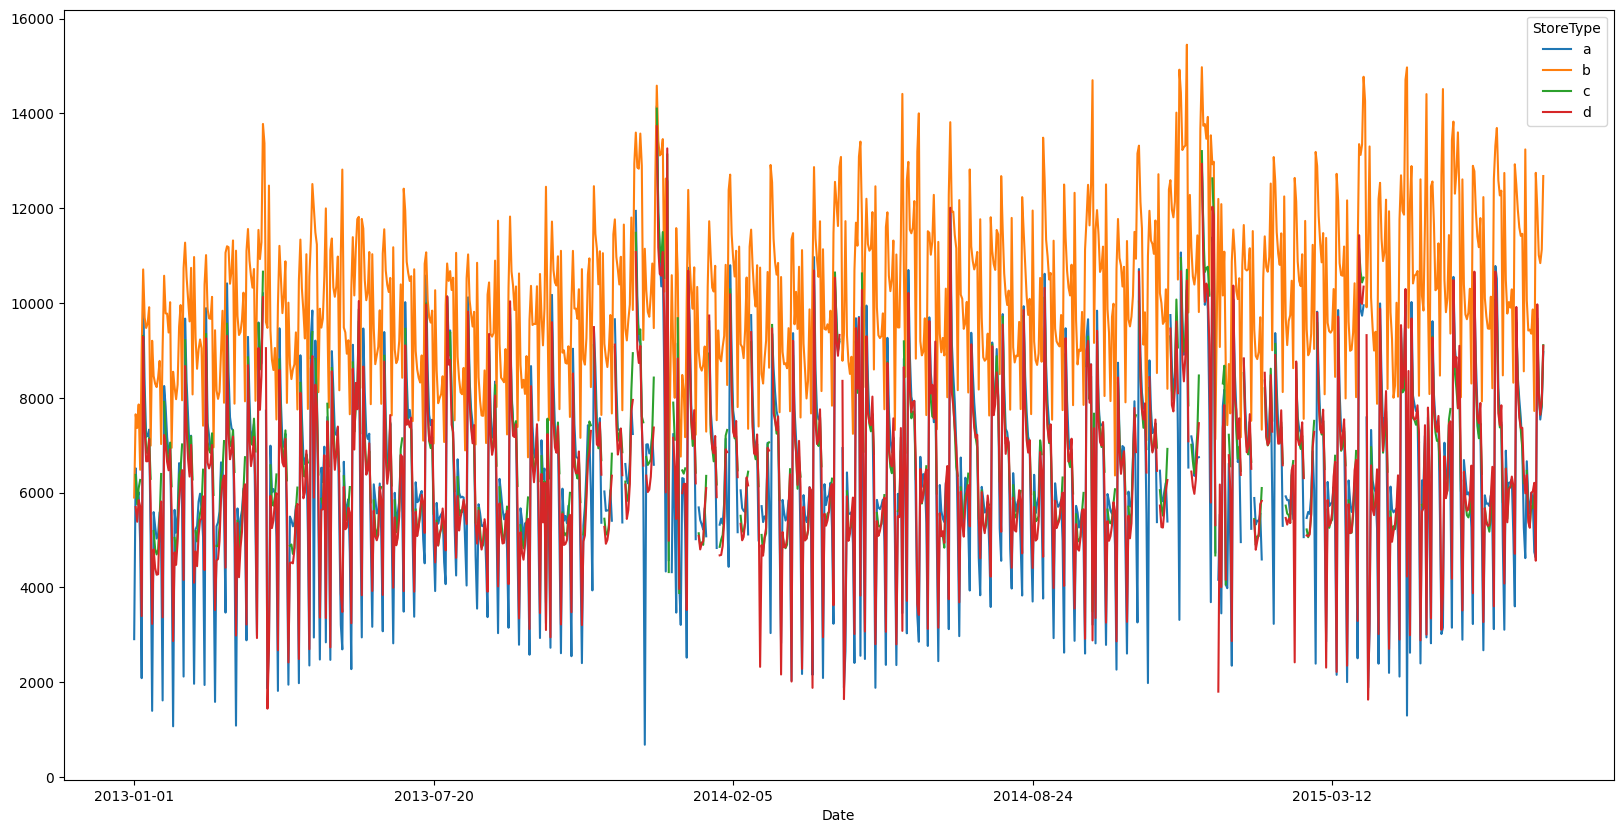

In [68]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax = ax);

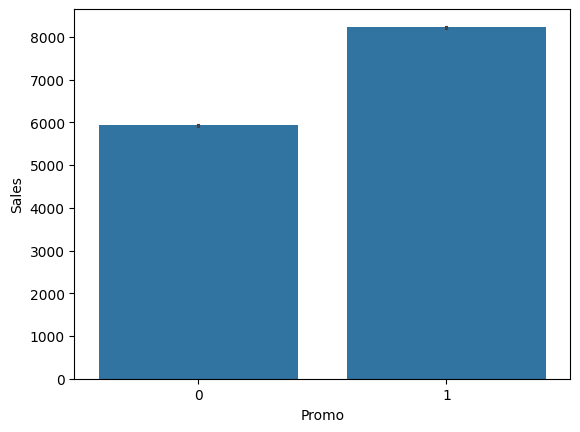

In [69]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

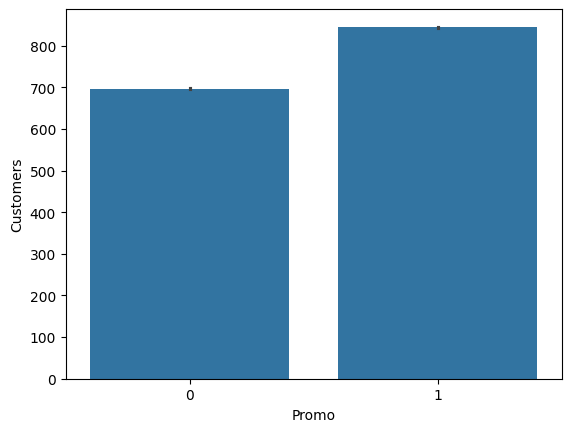

In [ ]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

## Model Training – Part 1: Prophet

In [ ]:
!pip install prophet

In [71]:
from prophet import Prophet

In [72]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


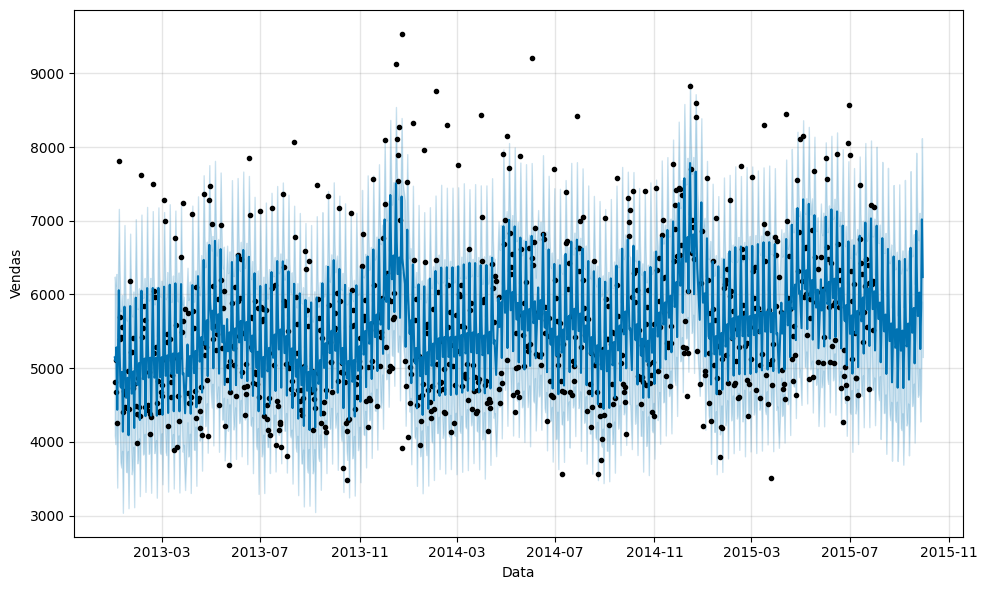

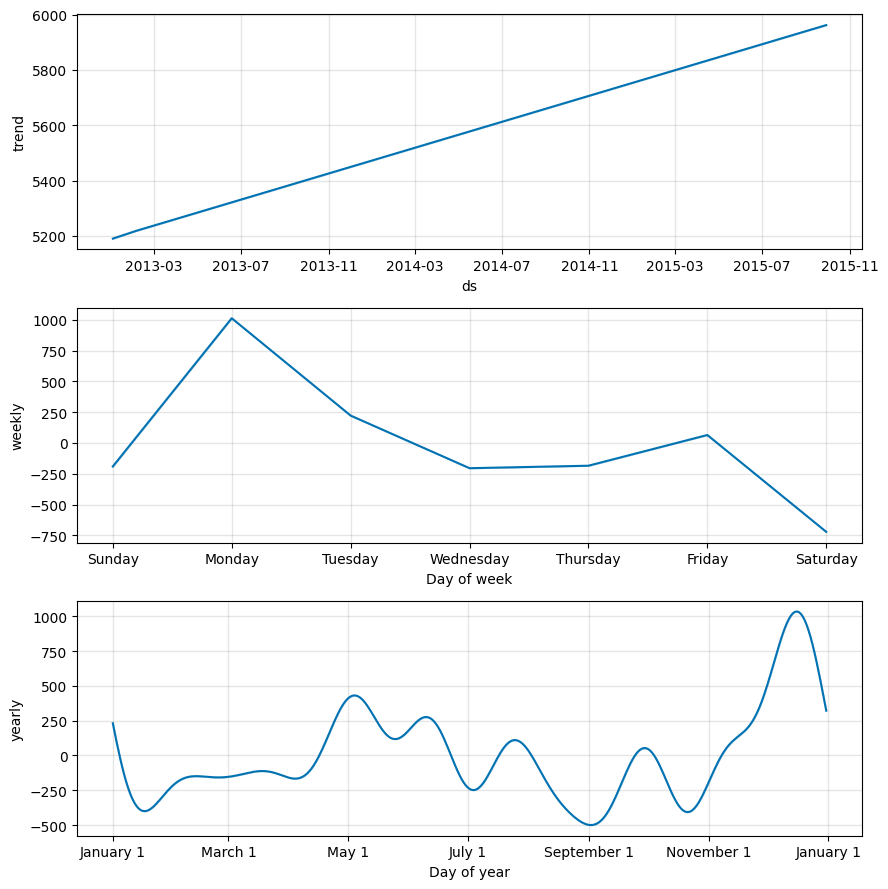

In [74]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60);

In [75]:
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [76]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5190.613639,4092.161119,6242.613296,5190.613639,5190.613639,-43.910321,-43.910321,-43.910321,-204.314475,-204.314475,-204.314475,160.404154,160.404154,160.404154,0.0,0.0,0.0,5146.703319
1,2013-01-03,5191.480804,3969.864335,6123.777094,5191.480804,5191.480804,-92.672039,-92.672039,-92.672039,-184.198177,-184.198177,-184.198177,91.526138,91.526138,91.526138,0.0,0.0,0.0,5098.808765
2,2013-01-04,5192.347968,4264.151351,6277.812766,5192.347968,5192.347968,90.439054,90.439054,90.439054,64.871147,64.871147,64.871147,25.567906,25.567906,25.567906,0.0,0.0,0.0,5282.787022
3,2013-01-05,5193.215132,3380.798995,5439.626027,5193.215132,5193.215132,-757.173513,-757.173513,-757.173513,-720.328379,-720.328379,-720.328379,-36.845134,-36.845134,-36.845134,0.0,0.0,0.0,4436.041620
4,2013-01-07,5194.949461,5098.271698,7161.099934,5194.949461,5194.949461,862.910439,862.910439,862.910439,1011.846312,1011.846312,1011.846312,-148.935873,-148.935873,-148.935873,0.0,0.0,0.0,6057.859900


In [77]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5916.525886,4227.188158,6265.944060,5916.525886,5916.525886,-675.504167,-675.504167,-675.504167,-720.328379,-720.328379,-720.328379,44.824211,44.824211,44.824211,0.0,0.0,0.0,5241.021719
785,2015-08-02,5917.294268,4742.879163,6790.342759,5917.294268,5917.294268,-165.648089,-165.648089,-165.648089,-190.330598,-190.330598,-190.330598,24.682509,24.682509,24.682509,0.0,0.0,0.0,5751.646180
786,2015-08-03,5918.062651,5777.294012,8002.965424,5918.062651,5918.062651,1014.627503,1014.627503,1014.627503,1011.846312,1011.846312,1011.846312,2.781191,2.781191,2.781191,0.0,0.0,0.0,6932.690154
787,2015-08-04,5918.831033,5092.525110,7153.084943,5918.831033,5918.831033,201.931853,201.931853,201.931853,222.454169,222.454169,222.454169,-20.522316,-20.522316,-20.522316,0.0,0.0,0.0,6120.762886
788,2015-08-05,5919.599415,4662.900539,6703.859353,5919.599415,5919.599415,-249.188214,-249.188214,-249.188214,-204.314475,-204.314475,-204.314475,-44.873738,-44.873738,-44.873738,0.0,0.0,0.0,5670.411201
789,2015-08-06,5920.367797,4567.958612,6699.823387,5920.367797,5920.367797,-254.128856,-254.128856,-254.128856,-184.198177,-184.198177,-184.198177,-69.930680,-69.930680,-69.930680,0.0,0.0,0.0,5666.238941
790,2015-08-07,5921.136179,4892.880796,6946.828304,5921.136179,5921.136179,-30.499277,-30.499277,-30.499277,64.871147,64.871147,64.871147,-95.370424,-95.370424,-95.370424,0.0,0.0,0.0,5890.636903
791,2015-08-08,5921.904561,4040.295017,6058.963078,5921.904561,5921.904561,-841.224994,-841.224994,-841.224994,-720.328379,-720.328379,-720.328379,-120.896615,-120.896615,-120.896615,0.0,0.0,0.0,5080.679568
792,2015-08-09,5922.672944,4605.156608,6674.004716,5922.672484,5922.672969,-336.575242,-336.575242,-336.575242,-190.330598,-190.330598,-190.330598,-146.244644,-146.244644,-146.244644,0.0,0.0,0.0,5586.097701
793,2015-08-10,5923.441326,5700.931261,7798.214693,5923.439480,5923.442694,840.660687,840.660687,840.660687,1011.846312,1011.846312,1011.846312,-171.185625,-171.185625,-171.185625,0.0,0.0,0.0,6764.102013


In [78]:
df_prediction.tail(60).to_csv('sales_forecasts.csv')

In [79]:
df_origin.tail()

,ds,y
4461,2015-07-27,7212
3348,2015-07-28,6140
2235,2015-07-29,5524
1122,2015-07-30,6186
9,2015-07-31,7185


## Model Training – Part 2

- **StateHoliday**: Indicates whether the day is a state holiday. Stores are usually closed on these holidays. Schools are closed on state holidays and weekends.  
  **Legend**:  
  - `a` = Public holiday  
  - `b` = Easter holiday  
  - `c` = Christmas holiday  
  - `0` = No holiday  

- **SchoolHoliday**: Indicates whether the store was affected by a school holiday.


In [81]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Sales')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [82]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [83]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [84]:
school_holidays

array(['2015-07-31', '2015-07-31', '2015-07-31', ..., '2013-01-01',
       '2013-01-01', '2013-01-01'], dtype=object)

In [85]:
len(np.unique(school_holidays))

477

In [86]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [87]:
state_holidays.shape

(910,)

In [88]:
len(np.unique(state_holidays))

35

In [89]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
905,2013-01-01,state_holiday
906,2013-01-01,state_holiday
907,2013-01-01,state_holiday
908,2013-01-01,state_holiday


In [90]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


In [91]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


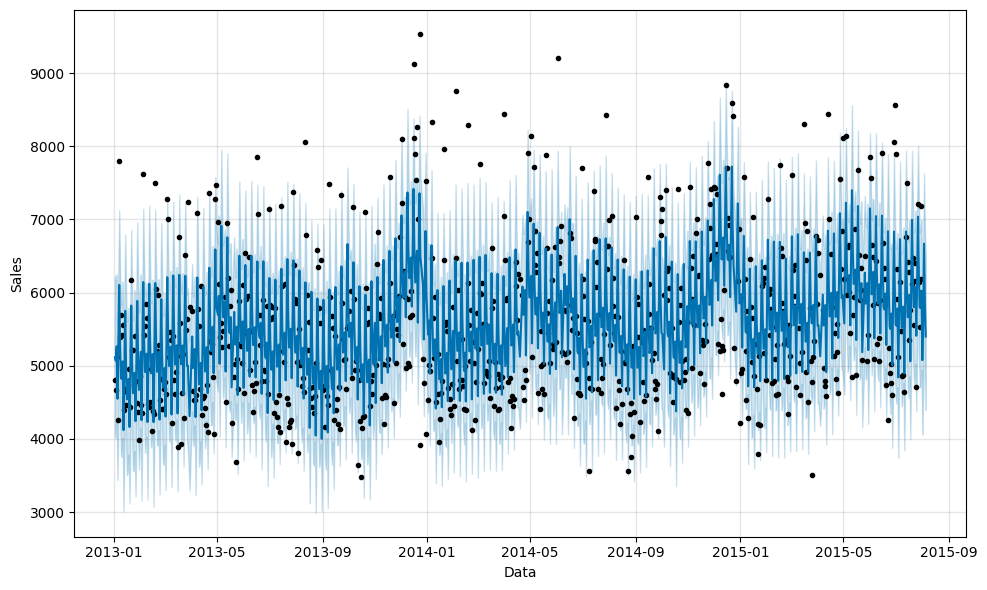

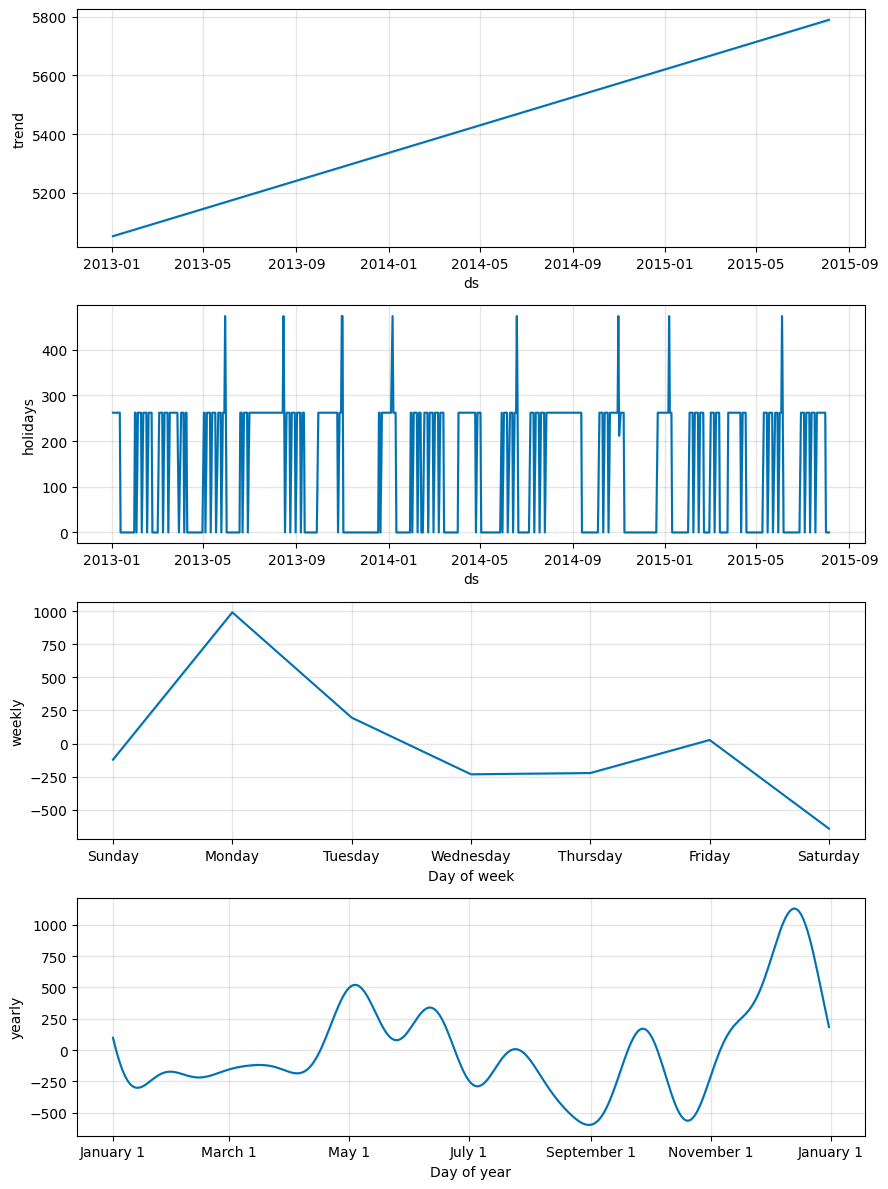

In [92]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [93]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5051.415618,4063.445548,6226.033039,5051.415618,5051.415618,65.519214,65.519214,65.519214,262.246237,...,-231.166688,-231.166688,-231.166688,34.439665,34.439665,34.439665,0.0,0.0,0.0,5116.934832
1,2013-01-03,5052.196838,4007.798926,6160.406170,5052.196838,5052.196838,16.433597,16.433597,16.433597,262.246237,...,-221.627030,-221.627030,-221.627030,-24.185610,-24.185610,-24.185610,0.0,0.0,0.0,5068.630435
2,2013-01-04,5052.978059,4257.118391,6246.818378,5052.978059,5052.978059,212.514207,212.514207,212.514207,262.246237,...,27.836705,27.836705,27.836705,-77.568735,-77.568735,-77.568735,0.0,0.0,0.0,5265.492265
3,2013-01-05,5053.759279,3438.340364,5563.774381,5053.759279,5053.759279,-504.488360,-504.488360,-504.488360,262.246237,...,-641.384248,-641.384248,-641.384248,-125.350348,-125.350348,-125.350348,0.0,0.0,0.0,4549.270919
4,2013-01-07,5055.321719,5038.078464,7124.458139,5055.321719,5055.321719,1049.599785,1049.599785,1049.599785,262.246237,...,990.623759,990.623759,990.623759,-203.270212,-203.270212,-203.270212,0.0,0.0,0.0,6104.921503
